In [2]:
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import mylibrary.nnlib as tnn

### 1D Regression Dataset

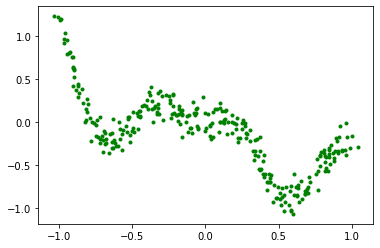

In [3]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
y = -y

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [25]:
optim = tnn.Adam(0.003)
net = tnn.AutoForm(new_layers=True)
# layer1 = tnn.LinearLayer(1, 15, optimizer=optim)
# # layer2 = tnn.LeakyRelu()
# layer2 = tnn.Relu()
# layer3 = tnn.LinearLayer(15, 1, optimizer=optim)

layer1 = tnn.LinearLayer(1, 10, optimizer=optim)
layer2 = tnn.LeakyRelu()
layer3 = tnn.LinearLayer(10, 10, optimizer=optim)
layer4 = tnn.LeakyRelu()
layer5 = tnn.LinearLayer(10, 1, optimizer=optim)

In [26]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for epoch in range(100000):
    layer3.weights = np.abs(layer3.weights)
#     layer5.weights = np.abs(layer5.weights)
    
    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')

        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.45305158436473847


100 Error =  0.09120229003205274


200 Error =  0.08602603808226435


300 Error =  0.0677098474716348


400 Error =  0.04052682880469366


500 Error =  0.022066247737430378


600 Error =  0.014871745095199014


700 Error =  0.01293568103145529


800 Error =  0.012267360835512294


TclError: invalid command name "."

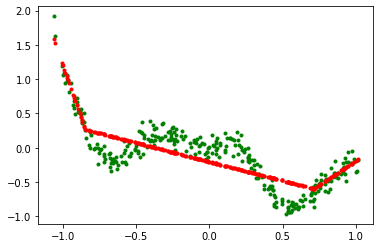

In [24]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

### 2D Regression Dataset

In [25]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
# X1 = np.linspace(-2.5, 0, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

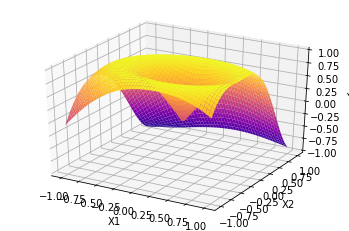

In [26]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1
# Y = -Y

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [1]:
optim = tnn.Adam(0.003)
net = tnn.AutoForm(new_layers=True)
# layer1 = tnn.LinearLayer(2, 15, optimizer=optim)
# # layer2 = tnn.LeakyRelu()
# layer2 = tnn.Relu()
# layer3 = tnn.LinearLayer(15, 1, optimizer=optim)

layer1 = tnn.LinearLayer(2, 10, optimizer=optim)
layer2 = tnn.LeakyRelu()
layer3 = tnn.LinearLayer(10, 10, optimizer=optim)
layer2 = tnn.LeakyRelu()
layer3 = tnn.LinearLayer(10, 1, optimizer=optim)

NameError: name 'tnn' is not defined

In [28]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    layer3.weights = -np.abs(layer3.weights)

    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  3.8342249009266824


100 Error =  0.4788557861178759


200 Error =  0.20531808040085434


300 Error =  0.12839776409217826


400 Error =  0.08803400555496926


500 Error =  0.06271112077507648


600 Error =  0.04793777970006746


700 Error =  0.039898674610924265


800 Error =  0.0352680320303646


900 Error =  0.03208985627975628


1000 Error =  0.029560894095397486


1100 Error =  0.027420111665188564


1200 Error =  0.02574045695842167


1300 Error =  0.02444831448561173


1400 Error =  0.02343096194050889


1500 Error =  0.02260412008623365


1600 Error =  0.0218950061605071


1700 Error =  0.021295318647344335


1800 Error =  0.02081004657253465


1900 Error =  0.020426507986755393


2000 Error =  0.020126997442424743


2100 Error =  0.019891217422759375


2200 Error =  0.01973168598504985


2300 Error =  0.01960469289321874


2400 Error =  0.019503699125155878


2500 Error =  0.019418513077097493


2600 Error =  0.019342792303523513


2700 Error =  0.019277079546910506

TclError: invalid command name "."

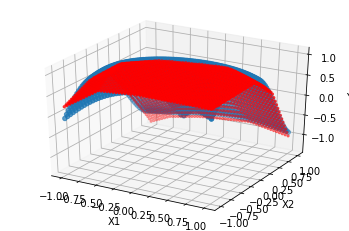

In [29]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## classification

In [35]:
from sklearn.datasets import make_moons

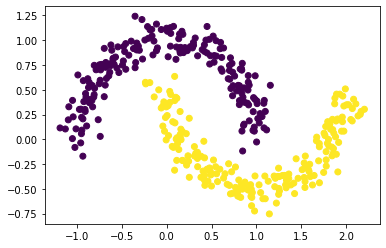

In [36]:
X, y = make_moons(n_samples=400, noise=0.1)
x1 = X[:,0]
x2 = X[:,1]

xx = X
yy = y.astype(float).reshape(-1,1)
%matplotlib inline
plt.scatter(x1, x2, c=y)

In [39]:
optim = tnn.Adam(0.01)
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, 50, optimizer=optim)
# layer2 = tnn.LeakyRelu()
layer2 = tnn.Relu()
layer3 = tnn.LinearLayer(50, 1, optimizer=optim)
layer4 = tnn.Sigmoid()

In [40]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for epoch in range(100000):
    layer3.weights = np.abs(layer3.weights)
    
    yout = net.forward(xx)
    
#     dy = tnn.SigmoidCrossEntropyBinary.del_loss(yout, yy)
    dy = tnn.CrossEntropyBinary.del_loss(yout, yy)
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
#         error = tnn.SigmoidCrossEntropyBinary.loss(yout, yy)
        error = tnn.CrossEntropyBinary.loss(yout, yy)

        print(epoch, 'Error = ', error)
        
        out = (yout>0.5).astype(float)
        
        ax.clear()
        ax.scatter(x1, x2, c=y)
        ax.scatter(x1, x2, c=out.reshape(-1), marker='.')

        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.0769142297284018


100 Error =  0.3331266081762561


200 Error =  0.26946838634033293


300 Error =  0.24760499016293283


400 Error =  0.23531072525226215


500 Error =  0.2283442881045189


600 Error =  0.22427469943588643


700 Error =  0.2216785314710561


800 Error =  0.219894046626655


900 Error =  0.2186172438965226


1000 Error =  0.2177224102699778


1100 Error =  0.21706441570909107


1200 Error =  0.21656990703515547


1300 Error =  0.21618346997247215


1400 Error =  0.21588988903204429


1500 Error =  0.21566074213488295


1600 Error =  0.2154732695481607


1700 Error =  0.21529099803975207


1800 Error =  0.21511321346977272


1900 Error =  0.21492052160480793


2000 Error =  0.2146344560267629


2100 Error =  0.21361622280259474


2200 Error =  0.21314047517343737


2300 Error =  0.21274169932838846


2400 Error =  0.21239500241095605


2500 Error =  0.21213431796637103


2600 Error =  0.21190436241416846


2700 Error =  0.2116870520776206


2800 Error =  0

TclError: invalid command name "."

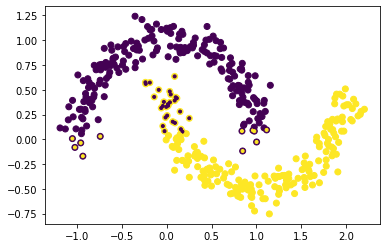

In [41]:
%matplotlib inline
plt.scatter(x1, x2, c=y)
plt.scatter(x1, x2, c=out.reshape(-1), marker='.')